<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
     Actual  Predicted
398       0          0
125       0          0
328       1          1
339       1          1
172       0          0
..      ...        ...
91        0          0
322       0          0
248       0          0
186       0          0
395       1          0

[120 rows x 2 columns]
Confusion Matrix 
 [[63  9]
 [14 34]]
Accuracy of model
80.83333333333333 %
Classification report: 
                    precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75       

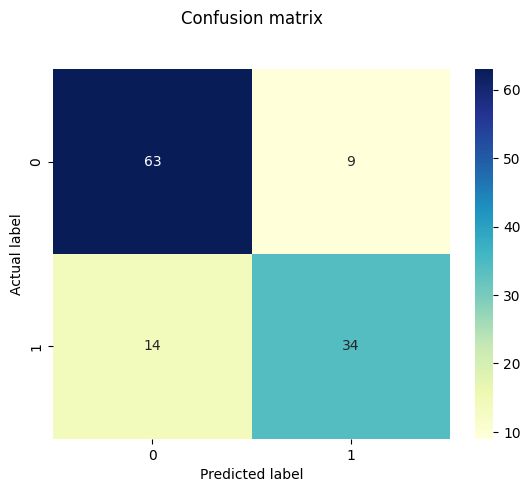

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

#CHECK FOR NULL VALUES
social_N_data.isnull().any()

# CLEAN THE DATA
social_N_data.drop('User ID', axis=1, inplace=True)

# CHANGE CATEGORICAL VARIABLE TO DUMMIES
social_N_data.info()
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data = pd.concat([social_N_data,gender], axis=1)

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
y = social_N_data.iloc[:, 2] # Purchased

# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

# EVALUATE MODEL
# predic_proba()
# print(classifier.predict_proba(X) # uncheck if needed
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')
#0.8083333333333333

# classification report
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))

In [3]:
X_train.shape

(280, 3)

In [4]:
classifier.intercept_

array([-1.1352347])

In [5]:
classifier.coef_

array([[2.36839196, 1.42929561, 0.20973787]])

In [6]:
social_N_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [8]:
y_test

398    0
125    0
328    1
339    1
172    0
      ..
91     0
322    0
248    0
186    0
395    1
Name: Purchased, Length: 120, dtype: int64

In [9]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
y_pred.shape

(120,)

In [20]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [21]:
y_pred_threshold = [1 if p >= 0.45 else 0 for p in y_pred_proba]

# Tính toán độ chính xác
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
print("Accuracy with threshold 0.45:", accuracy_threshold)

Accuracy with threshold 0.45: 0.8333333333333334


In [22]:
coefficients = classifier.coef_
slope = coefficients[0][1]  # Lấy hệ số góc tương ứng với EstimatedSalary

print("Slope of EstimatedSalary:", slope)

Slope of EstimatedSalary: 1.4292956108514927


In [23]:
y_pred_threshold = [1 if p >= 0.45 else 0 for p in y_pred_proba]

# Tính toán số lượng TP và TN
TP = sum((y_pred_threshold == 1) & (y_test == 1))
TN = sum((y_pred_threshold == 0) & (y_test == 0))

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)

True Positive (TP): 0
True Negative (TN): 0


In [24]:
y_pred_default = classifier.predict(X_test)

# Tính toán độ chính xác
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy with default threshold (0.5):", accuracy_default)

Accuracy with default threshold (0.5): 0.8083333333333333


In [25]:
# Giá trị cần chuẩn hóa
age = 46
salary = 49000

# Giá trị tối thiểu và tối đa của tuổi và lương trong tập huấn luyện
age_min = data['Age'].min()
age_max = data['Age'].max()
salary_min = data['EstimatedSalary'].min()
salary_max = data['EstimatedSalary'].max()

# Chuẩn hóa giá trị tuổi và lương
normalized_age = (age - age_min) / (age_max - age_min)
normalized_salary = (salary - salary_min) / (salary_max - salary_min)

print("Normalized Age:", normalized_age)
print("Normalized Salary:", normalized_salary)


NameError: name 'data' is not defined

In [30]:
import numpy as np
h=X_test[0]
X_test_first_row = h

# Tính giá trị đầu ra trước khi đi qua hàm sigmoid
decision_value = classifier.decision_function(X_test_first_row)

print("Decision Value:", decision_value)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.15807423 -1.07893824  1.02020406].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một scaler và fit_transform dữ liệu
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Lấy giá trị lương của dòng cuối cùng
salary_last_row_normalized = X_normalized[-1, EstimatedSalary]
print("Normalized Salary (Min-Max):", salary_last_row_normalized)

NameError: name 'salary_index' is not defined

In [41]:
import numpy as np
last_row_train = X_train.iloc[-1]

# Lấy giá trị tuổi từ dòng cuối cùng
age_last_row_train = last_row_train['Age']

print('Giá trị tuổi của dòng cuối cùng trong tập dữ')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [42]:
import numpy as np

# Lấy dòng đầu tiên trong tập test
X_test_first_row = X_test.iloc[[0]]

# Tiền xử lý dữ liệu đầu vào
X_test_first_row_processed = scaler.transform(X_test_first_row)

# Tính giá trị output sau khi đi qua hàm sigmoid
output = classifier.predict_proba(X_test_first_row_processed)[:, 1]

print("Giá trị output sau khi đi qua hàm sigmoid:", output[0])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'